# Importing python libraries

In [1]:
import numpy as np 
import pandas as pd 
import hashlib
from collections import defaultdict

# Reading data from csv file

In [2]:
df=pd.read_csv('flipkart_com-ecommerce.csv')
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [3]:
df.shape

(20000, 15)

In [4]:
df.head(15)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

# Data preprocessing

In [5]:
df.dropna(how="all",inplace=True)
df.fillna({'product_name':'NaN','retail_price':0},inplace=True)

In [6]:
df.head(15)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [7]:
df.shape

(20000, 15)

# Counting Distinct product names

In [8]:
product=df['product_name']
prod_list=product.values
prod_list

array(["Alisha Solid Women's Cycling Shorts",
       'FabHomeDecor Fabric Double Sofa Bed', 'AW Bellies', ...,
       'Elite Collection Medium Acrylic Sticker',
       'Elite Collection Medium Acrylic Sticker',
       'Elite Collection Medium Acrylic Sticker'], dtype=object)

# Using Flajolot-Martin Algorithm

In [9]:
type(prod_list)

numpy.ndarray

In [10]:
def hash_string_1(s):
    """
    Return the SHA-1 hash for a given string.
    """
    return hashlib.sha1(str.encode(s)).hexdigest()

def hash_string_2(s):
    """
    Return the SHA-256 hash for a given string.
    """
    return hashlib.sha384(str.encode(s)).hexdigest()

def hash_string_3(s):
    """
    Return the SHA-384 hash for a given string.
    """
    return hashlib.sha512(str.encode(s)).hexdigest()

def hash_string_4(s):
    """
    Return the MD-5 hash for a given string.
    """
    return hashlib.md5(str.encode(s)).hexdigest()


In [11]:
def hexstring_to_int(s):
    """
    Convert a hexadecimal number to a base 10 integer.
    """
    return int(s, 16)

In [12]:
def int_to_bin(i):
    """
    Convert an integer to a binary number.
    """
    return bin(i)

In [13]:
def trailing_zeroes(bs):
    s = str(bs)
    s = s[2:]
    
    l= len(s)-len(s.rstrip('0'))
    if l==len(s):
        return 0
    else:
        return l

In [14]:
mtz=[-1,-1,-1,-1]
count=[]
for name in prod_list:
    hstring=hash_string_1(name)
    hint=hexstring_to_int(hstring)
    hbin=int_to_bin(hint)
    tz=trailing_zeroes(hbin)
    if mtz[0]==-1 or mtz[0]<tz:
        mtz[0]=tz
count.append(2**mtz[0])

for name in prod_list:
    hstring=hash_string_2(name)
    hint=hexstring_to_int(hstring)
    hbin=int_to_bin(hint)
    tz=trailing_zeroes(hbin)
    if mtz[1]==-1 or mtz[1]<tz:
        mtz[1]=tz
count.append(2**mtz[1])

for name in prod_list:
    hstring=hash_string_3(name)
    hint=hexstring_to_int(hstring)
    hbin=int_to_bin(hint)
    tz=trailing_zeroes(hbin)
    if mtz[2]==-1 or mtz[2]<tz:
        mtz[2]=tz
count.append(2**mtz[2])

for name in prod_list:
    hstring=hash_string_4(name)
    hint=hexstring_to_int(hstring)
    hbin=int_to_bin(hint)
    tz=trailing_zeroes(hbin)
    if mtz[3]==-1 or mtz[3]<tz:
        mtz[3]=tz
count.append(2**mtz[3])


In [15]:
print('Using FM algorithm to find distinct elements')
print('Count of distinct product_name are :')
print('Using sha1 hash : ',count[0])
print('Using sha384 hash : ',count[1])
print('Using sha512 hash : ',count[2])
print('Using md5 hash : ',count[3])


Using FM algorithm to find distinct elements
Count of distinct product_name are :
Using sha1 hash :  16384
Using sha384 hash :  16384
Using sha512 hash :  16384
Using md5 hash :  8192


In [16]:
import statistics
set1 = count[:2]
set2 = count[2:]
s1=statistics.mean(set1)
s2=statistics.mean(set2)
median = (s1+s2)/2
print('Distinct number of product name using fm algorithm mean-median approximation :')
print(median)

Distinct number of product name using fm algorithm mean-median approximation :
14336.0


In [17]:
corr=map(lambda x: x/0.71351,count)
cr=list(corr)
print('Count of distinct product_name after applying correction factor  :')
print('Using sha1 hash : ',cr[0])
print('Using sha384 hash : ',cr[1])
print('Using sha512 hash : ',cr[2])
print('Using md5 hash : ',cr[3])

Count of distinct product_name after applying correction factor  :
Using sha1 hash :  22962.53731552466
Using sha384 hash :  22962.53731552466
Using sha512 hash :  22962.53731552466
Using md5 hash :  11481.26865776233


In [18]:
unq_prod=len(df['product_name'].unique())
fm1=median
print('The count of actual number of distinct product names :')
print(unq_prod)


The count of actual number of distinct product names :
12676


In [19]:
error=median-unq_prod
error_rate=error/unq_prod*100
fm1e=error_rate
print('The % error of fm algorithm is ')
print(error_rate)


The % error of fm algorithm is 
13.09561375828337


# Counting distinct number of retail price using FM algorithm

In [20]:
price=df['retail_price']
pr=price.values
pr=pr.astype(int)
pr

array([  999, 32157,   999, ...,  1299,  1499,  1499])

In [21]:

prlist = [i for i in pr.tolist() if i != 0] 
prlist

[999,
 32157,
 999,
 699,
 220,
 430,
 1199,
 32157,
 699,
 1199,
 1724,
 2299,
 999,
 699,
 999,
 32157,
 899,
 2499,
 32157,
 110,
 2400,
 1500,
 190,
 1299,
 3199,
 499,
 699,
 2199,
 799,
 999,
 499,
 499,
 1000,
 1200,
 350,
 899,
 999,
 899,
 1999,
 1499,
 6999,
 2299,
 999,
 899,
 2099,
 6500,
 9990,
 1399,
 899,
 1299,
 8999,
 899,
 10000,
 899,
 899,
 1399,
 1399,
 1399,
 999,
 1649,
 1399,
 899,
 899,
 1849,
 999,
 440,
 1495,
 280,
 795,
 1899,
 1990,
 250,
 600,
 440,
 2699,
 1999,
 1499,
 2599,
 900,
 2599,
 999,
 1600,
 1025,
 750,
 1299,
 18995,
 4995,
 13699,
 3495,
 24400,
 1095,
 1099,
 5398,
 2499,
 3999,
 1799,
 1415,
 1099,
 2095,
 3999,
 999,
 3295,
 2499,
 5495,
 2299,
 107750,
 4195,
 1499,
 2795,
 3199,
 4295,
 1199,
 3995,
 571230,
 1199,
 1049,
 2000,
 3499,
 2299,
 1999,
 1120,
 2799,
 3495,
 1699,
 1599,
 3295,
 1099,
 3295,
 3499,
 350,
 3695,
 201000,
 3399,
 2199,
 1200,
 1550,
 2999,
 2299,
 3999,
 2299,
 375,
 1199,
 2199,
 475,
 1095,
 399,
 3999,
 39

In [22]:
len(prlist)

19922

In [23]:
print("Hash functions defined as (a*x+b)\%c, where x is an element of the set.")
inputCount = int(input("Enter the number of hash functions: "))
abcList = []

for i in range(inputCount):
    inputList = input("Enter the space-separated values of a, b and c: ").split(" ")
    abcList.append([int(i) for i in inputList])
finalCountsRecorded = []

for i in abcList:
    binElems = []
    for j in prlist:
        binElems.append(str(bin((i[0]*j+i[1])%i[2])).split("b")[1])
    greatestTrailing = 0
    for k in binElems:
        reversedCount = k[::-1]
        count = 0
        for i in reversedCount:
            if(i=='1'):
                if(count>greatestTrailing):
                    greatestTrailing = count
                break
            else:
                count+=1
    finalCountsRecorded.append(2**greatestTrailing)
print("Counts recorded for each hash: ",finalCountsRecorded)

divider = inputCount//2
set1 = finalCountsRecorded[:divider]
set2 = finalCountsRecorded[divider:]
g1=statistics.mean(set1)
g2=statistics.mean(set2)
median_t = (g1+g2/2)

Hash functions defined as (a*x+b)\%c, where x is an element of the set.
Enter the number of hash functions: 4
Enter the space-separated values of a, b and c: 7 13 37000
Enter the space-separated values of a, b and c: 7 11 36000
Enter the space-separated values of a, b and c: 11 17 40000
Enter the space-separated values of a, b and c: 3 11 34000
Counts recorded for each hash:  [1024, 2048, 1024, 2048]


In [24]:
print('the count of distinct number of retail price using fm algorithm :')
print(median_t)

the count of distinct number of retail price using fm algorithm :
2304.0


In [25]:
rt_actual=len(df['retail_price'].unique())
fm2=median_t
print('the count of actual number of distinct retail price is :')
rt_actual

the count of actual number of distinct retail price is :


2248

In [26]:
error=abs(median_t-rt_actual)
error_rate=error/rt_actual*100
fm2e=error_rate
print('% error using fm algorithm :')
print(error_rate)

% error using fm algorithm :
2.491103202846975


# Counting distinct product name using HyperLogLog algorithm

In [27]:
print(prod_list)

["Alisha Solid Women's Cycling Shorts"
 'FabHomeDecor Fabric Double Sofa Bed' 'AW Bellies' ...
 'Elite Collection Medium Acrylic Sticker'
 'Elite Collection Medium Acrylic Sticker'
 'Elite Collection Medium Acrylic Sticker']


In [28]:
def first_nonzero_bit(bs):
    
    bs = bs[2:]
    #return len(bs) - bs.index('1')
    return bs[::-1].index('1')

In [29]:
def element_to_register_nonzero(elem):
  
    elem_hash = hash_string_1(elem)
    register = hexstring_to_int(get_hll_register_num(elem_hash))
    hll_hash = get_hll_hash(elem_hash)
    fnz_bit = first_nonzero_bit(int_to_bin(hexstring_to_int(hll_hash)))
    return (register, fnz_bit)

In [30]:
def cardinality_estimate(maxbits):
   
    tot_regs = len(maxbits)
    two_inv_sum = sum(map(lambda m: pow(2, -1*m), maxbits))
    return 0.7213/(1 + 1.079/tot_regs) * pow(tot_regs,2) * 1/two_inv_sum


In [31]:
def get_hll_register_num(hs):
   
    return hs[:3]

In [32]:
def get_hll_hash(hs):

    return hs[-14:]

In [33]:
def HLL(items):
   
    dim_reg_maxbit = defaultdict(lambda: defaultdict(int))
    for item in items:
        i_dim, i_elem = item,item
        i_reg, i_fnz_bit = element_to_register_nonzero(i_elem)
        dim_reg_maxbit[i_dim][i_reg] = max(dim_reg_maxbit[i_dim][i_reg], i_fnz_bit)
    estimates = []
    for dim in dim_reg_maxbit:
        maxbits = [v for _, v in dim_reg_maxbit[dim].items()]
        estimates.append((dim, cardinality_estimate(maxbits)))
    return estimates

In [34]:
def count(items):
   
    res = defaultdict(lambda: set([]))
    for dim in items:
        res[dim].add(dim)
    return [(k, len(v)) for k, v in res.items()]

In [35]:
def print_cmp(estimates, actuals):
    width = 55
    print("{: <{width}}\t{: <{width}}\t{: <{width}}".format("product name", "estimate", "actual", width=width))
    for i, j in zip(estimates, actuals):
        print("{: <{width}}\t{: <{width}}\t{: <{width}}".format(i[0], i[1], j[1], width=width))

In [36]:
 hll_counts = HLL(prod_list)
actual_counts = count(prod_list)
print('Distinct Product name - estimated vs actual number of occurences using hyperloglog algorithm : ')
print_cmp(hll_counts, actual_counts)

Distinct Product name - estimated vs actual number of occurences using hyperloglog algorithm : 
product name                                           	estimate                                               	actual                                                 
Alisha Solid Women's Cycling Shorts                    	1.387782587782588                                      	1                                                      
FabHomeDecor Fabric Double Sofa Bed                    	0.346945646945647                                      	1                                                      
AW Bellies                                             	0.693891293891294                                      	1                                                      
Sicons All Purpose Arnica Dog Shampoo                  	0.346945646945647                                      	1                                                      
Eternal Gandhi Super Series Crystal Paper Weights  with Silver F

Goodwill Impex Casual 3/4 Sleeve Embroidered Women's Top	2.775565175565176                                      	1                                                      
Harpa Casual Short Sleeve Solid Women's Top            	0.346945646945647                                      	1                                                      
Ffashionstylus Party Short Sleeve Printed Women's Top  	2.775565175565176                                      	1                                                      
Harpa Casual 3/4 Sleeve Solid Women's Top              	0.346945646945647                                      	1                                                      
I Am For You Casual Sleeveless Solid Women's Top       	0.346945646945647                                      	1                                                      
HRX Casual Sleeveless Striped Women's Top              	0.346945646945647                                      	1                                              

Addons Bella Alloy Necklace                            	1.387782587782588                                      	1                                                      
Shoppingtara Paper Mache 3 Piece Elephant Home Decor Gift Showpiece  -  4 cm	0.346945646945647                                      	1                                                      
Allure Auto CM 195 Car Mat Hyundai Verna Fluidic       	1.387782587782588                                      	1                                                      
Aaishwarya Glamour Green Crystal Alloy Necklace        	0.346945646945647                                      	1                                                      
Allure Auto CM 1733 Car Mat HM Ambassador MPFi         	0.693891293891294                                      	1                                                      
UpTown Fabric Necklace                                 	1.387782587782588                                      	1                          

Park Avenue Elevate , Alpha Deodorant Spray Combo Set  	0.346945646945647                                      	1                                                      
Fashion Era Metal Necklace                             	0.346945646945647                                      	1                                                      
Zyxel PLA4231 500 Mbps Powerline Wireless N Extender (Single Pack)	0.346945646945647                                      	1                                                      
Fayon Neon Pink Tassel Alloy Necklace                  	0.346945646945647                                      	1                                                      
AOC Girl Polkadot Art Cloth Pencil Box                 	1.387782587782588                                      	1                                                      
Smartcraft Generic Pendant Art Cloth Pencil Box        	5.551130351130352                                      	1                                    

GM Power mate 4 Strip Surge Protector                  	0.693891293891294                                      	1                                                      
Power Smart Quick Charging Pack For CAS NP60 Digi Camcorder  Camera Battery Charger	0.346945646945647                                      	1                                                      
Shrih SH-0192 Wired USB Flexible Keyboard              	0.346945646945647                                      	1                                                      
ISHWA Full Sleeve Graphic Print Men's Sweatshirt       	0.346945646945647                                      	1                                                      
Threads & Pals Full Sleeve Printed, Solid Men's Sweatshirt	0.693891293891294                                      	1                                                      
Threads & Pals Full Sleeve Self Design Men's Sweatshirt	0.346945646945647                                      	1                

Nexus NX_7557 Analog Watch  - For Women                	0.346945646945647                                      	1                                                      
Flippd FDDC03 Analog Watch  - For Men                  	0.693891293891294                                      	1                                                      
Maxima 07035LMLI Attivo Analog Watch  - For Women      	0.346945646945647                                      	1                                                      
Gift Island SW13388E Fashionin Digital Watch  - For Men	0.346945646945647                                      	1                                                      
Fastrack 9912PP18 Tees Analog Watch  - For Men, Women  	0.693891293891294                                      	1                                                      
Timewel 1100-N1949_S Analog Watch  - For Women         	0.346945646945647                                      	1                                               

ATC anbc40 Two Wheeler Cover                           	0.693891293891294                                      	1                                                      
Puma Solid Cap Cap                                     	0.346945646945647                                      	1                                                      
9blings Cubic Zirconia Yellow Gold Plated Alloy Nose Ring	0.346945646945647                                      	1                                                      
The Intellect Bazaar Cotton Bath Towel, Baby Towel     	0.693891293891294                                      	1                                                      
ATC MultiATC 25 Two Wheeler Cover                      	0.693891293891294                                      	1                                                      
ATC BLackATC 41 Two Wheeler Cover                      	0.346945646945647                                      	1                                             

Home Originals Floral Double Quilts & Comforters Multicolor	0.346945646945647                                      	1                                                      
Ratnam Gold Ruby, Diamond 14 K Ring                    	0.346945646945647                                      	1                                                      
Rock Flip Cover for iPad Air                           	1.387782587782588                                      	1                                                      
BlueStone The Dali White Gold Diamond 18 K Ring        	5.551130351130352                                      	1                                                      
Sapatos Plain Single Duvet Red                         	0.346945646945647                                      	1                                                      
Decot Paradise Solid Women's Regular Skirt             	0.346945646945647                                      	1                                           

99 Moves Boots                                         	1.387782587782588                                      	1                                                      
Get Glamr Designer Canvas Shoes                        	0.693891293891294                                      	1                                                      
People Casual Shoes                                    	0.346945646945647                                      	1                                                      
JJC LH-86  Lens Hood                                   	1.387782587782588                                      	1                                                      
Knotty Derby Black Dolohov Tc Boots                    	0.346945646945647                                      	1                                                      
Benera Camouflage Trop God Boots                       	0.346945646945647                                      	1                                               

Gi De Meo Alloy Bracelet                               	0.693891293891294                                      	1                                                      
Aara Arts Alloy Bracelet                               	0.346945646945647                                      	1                                                      
R S Jewels Alloy Bangle Set                            	1.387782587782588                                      	1                                                      
SSCP Safflower Oil                                     	0.346945646945647                                      	1                                                      
Advikacreations Metal Bracelet                         	0.346945646945647                                      	1                                                      
Via Mazzini Leather Bracelet                           	1.387782587782588                                      	1                                               

RJVON H4 Led Bike Head Light RJ48386 LED Headlight With Bulb For Royal Enfield	0.346945646945647                                      	1                                                      
Asmi"s INTERNATIONAL 1 BIG Headlight FlashLight LED Spot Light	0.346945646945647                                      	1                                                      
SRPC BAOER STARWALKER EXECUTIVE ROLLERBALL Pen Gift Set	0.346945646945647                                      	1                                                      
Kraft Seeds Rosemary Herb (Pack Of 5) Seed             	0.346945646945647                                      	1                                                      
eSms Lightweight Hose Pipe 1 L Hand Held Sprayer       	0.346945646945647                                      	1                                                      
Autoplus M AP15 Arm Sleeve                             	0.693891293891294                                      	1                 

In [37]:
hlcount=0
for i in hll_counts:
    hlcount+=1
print('Total number of distinct product names using hyperloglog algorithm :')
print(hlcount)

Total number of distinct product names using hyperloglog algorithm :
12676


In [38]:
! pip install python-dev

In [39]:
! pip install HLL

In [40]:
from HLL import HyperLogLog

hll = HyperLogLog(10)
for i in prod_list:
    hll.add(i)
estimate = hll.cardinality()

In [41]:
hll

In [42]:
estimate
hll1=estimate
print('Distinct product names using hyperloglog python librabry :',estimate)

Distinct product names using hyperloglog python librabry : 12431.6787772715


In [43]:
unq_prod=len(df['product_name'].unique())
print('Actual count of Distinct product names is :')
unq_prod

Actual count of Distinct product names is :


12676

In [44]:
error=abs(estimate-unq_prod)
error_rate=error/unq_prod*100
hll1e=error_rate
print('%error in hll algorithm is  :')
error_rate

%error in hll algorithm is  :


1.9274315456650384

# Count of distinct retail prices using HLL algorithm

In [45]:
hll = HyperLogLog(12)
for i in pr:
    hll.add(i)
estimate = hll.cardinality()

In [46]:
hll2=estimate
print('Distinct product names using hyperloglog python librabry :',estimate)


Distinct product names using hyperloglog python librabry : 2272.234937142584


In [47]:
rt_actual=len(df['retail_price'].unique())
print('Actual count of Distinct retail prices is :')
rt_actual

Actual count of Distinct retail prices is :


2248

In [48]:
error=abs(estimate-rt_actual)
error_rate=error/rt_actual*100
hll2e=error_rate
print('%error in hll algorithm is  :')
error_rate

%error in hll algorithm is  :


1.078066598869392

# Comparing the results of FM and HLL algorithms

In [49]:
! pip install PTable

In [50]:
from prettytable import PrettyTable
    
x = PrettyTable()

In [51]:
x.field_names = ["Compare","Actual count","FM Count","FM_ERROR_%","HLL Count","HLL_ERROR_%"]
x.add_row(["product_name",unq_prod,fm1,fm1e,hll1,hll1e])
x.add_row(["retail_price",rt_actual,fm2,fm2e,hll2,hll2e])
print(x)

+--------------+--------------+----------+-------------------+-------------------+--------------------+
|   Compare    | Actual count | FM Count |     FM_ERROR_%    |     HLL Count     |    HLL_ERROR_%     |
+--------------+--------------+----------+-------------------+-------------------+--------------------+
| product_name |    12676     | 14336.0  | 13.09561375828337 |  12431.6787772715 | 1.9274315456650384 |
| retail_price |     2248     |  2304.0  | 2.491103202846975 | 2272.234937142584 | 1.078066598869392  |
+--------------+--------------+----------+-------------------+-------------------+--------------------+


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
sns.set()

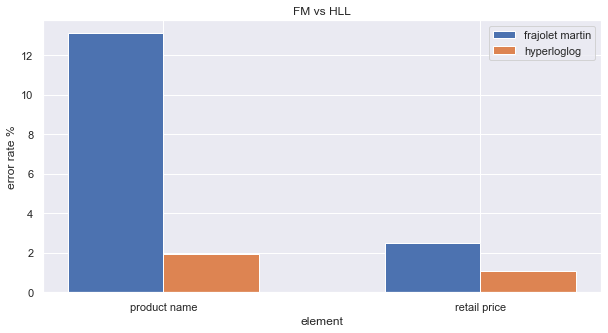

In [54]:

blue_bar = (fm1e,fm2e)

orange_bar = (hll1e,hll2e)


ind = np.arange(2)

plt.figure(figsize=(10,5))

width = 0.3       


plt.bar(ind, blue_bar , width, label='frajolet martin')
plt.bar(ind + width, orange_bar, width, label='hyperloglog')

plt.xlabel('element')
plt.ylabel('error rate %')
plt.title('FM vs HLL')


plt.xticks(ind + width / 2, ('product name', 'retail price'))


plt.legend(loc='best')
plt.show()



# Data Preprocessing

In [55]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [56]:
df.dropna(how='any')
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

# Working on data - product catagory

In [57]:
aa=df['product_category_tree']
bb=aa.values
aa


0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 20000, dtype: object

In [58]:
cc=[]
for s in bb:
    ww=s.split(">>")
    rr=ww[0].split('["')
    ff=rr[1].split('"]')
    cc.append(ff[0])
len(cc)
cc

['Clothing ',
 'Furniture ',
 'Footwear ',
 'Clothing ',
 'Pet Supplies ',
 'Eternal Gandhi Super Series Crystal Paper Weight...',
 'Clothing ',
 'Furniture ',
 'Footwear ',
 'Clothing ',
 'Footwear ',
 'Clothing ',
 'Pet Supplies ',
 'Clothing ',
 'Pens & Stationery ',
 'Clothing ',
 'Furniture ',
 'Footwear ',
 'Clothing ',
 'Furniture ',
 'Pet Supplies ',
 'Clothing ',
 'Clothing ',
 'Footwear ',
 'Pet Supplies ',
 'Clothing ',
 'Sports & Fitness ',
 'Beauty and Personal Care ',
 'Clothing ',
 'Clothing ',
 'Bengal Blooms Rose Artificial Plant  with Pot (3...',
 'Clothing ',
 'Pens & Stationery ',
 'Pens & Stationery ',
 'Pens & Stationery ',
 'Clothing ',
 'Pens & Stationery ',
 'Clothing ',
 'Bags, Wallets & Belts ',
 'Clothing ',
 'Footwear ',
 'Home Decor & Festive Needs ',
 'Automotive ',
 'Tools & Hardware ',
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Straight Kurta",
 "Vishudh Printed Women's Anarkali Kurta",
 'BuildTrack PIR Wireless Motion Sensor -

# Working on data -  day, month, year 

In [59]:
df['date'] = df['crawl_timestamp'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,date
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25


In [60]:
df['Date'] = pd.to_datetime(df.date)
df['day'] = df['Date'].dt.day.astype('object')

df['month'] = df['Date'].dt.month.astype('object')

df['year'] = df['Date'].dt.year.astype('object')

In [61]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,date,Date,day,month,year
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016-03-25,25,3,2016
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25,2016-03-25,25,3,2016
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25,2016-03-25,25,3,2016
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016-03-25,25,3,2016
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25,2016-03-25,25,3,2016


In [62]:
df['catagory']=cc
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,date,Date,day,month,year,catagory
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016-03-25,25,3,2016,Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25,2016-03-25,25,3,2016,Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25,2016-03-25,25,3,2016,Footwear
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016-03-25,25,3,2016,Clothing
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25,2016-03-25,25,3,2016,Pet Supplies


In [63]:
rp=df['retail_price']
dp=df['discounted_price']
rpl=rp.values
dpl=dp.values


In [64]:
rpl

array([  999., 32157.,   999., ...,  1299.,  1499.,  1499.])

In [65]:
dpl

array([  379., 22646.,   499., ...,   999.,  1199.,   999.])

# Creating column 'money saved' = retail_price - discounted_price

In [66]:
df['money_saved']=[x-y for x,y in zip(rpl,dpl) ]

In [67]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,date,Date,day,month,year,catagory,money_saved
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016-03-25,25,3,2016,Clothing,620.0
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25,2016-03-25,25,3,2016,Furniture,9511.0
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25,2016-03-25,25,3,2016,Footwear,500.0
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016-03-25,25,3,2016,Clothing,432.0
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25,2016-03-25,25,3,2016,Pet Supplies,10.0


In [68]:
df.drop(['crawl_timestamp', 'product_url','product_category_tree','uniq_id','image','is_FK_Advantage_product','description','product_rating','overall_rating','product_specifications','date'], axis=1,inplace=True)


In [69]:
df

,product_name,pid,retail_price,discounted_price,brand,Date,day,month,year,catagory,money_saved
0,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,Alisha,2016-03-25,25,3,2016,Clothing,620.0
1,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor,2016-03-25,25,3,2016,Furniture,9511.0
2,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,AW,2016-03-25,25,3,2016,Footwear,500.0
3,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,Alisha,2016-03-25,25,3,2016,Clothing,432.0
4,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,Sicons,2016-03-25,25,3,2016,Pet Supplies,10.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,STIE7KFJAKSTDY9G,1500.0,730.0,WallDesign,2015-12-01,1,12,2015,Baby Care,770.0
19996,Wallmantra Large Vinyl Stickers Sticker,STIE9F5URNQGJCGH,1429.0,1143.0,Wallmantra,2015-12-01,1,12,2015,Baby Care,286.0
19997,Elite Collection Medium Acrylic Sticker,STIE7VAYDKQZEBSD,1299.0,999.0,Elite Collection,2015-12-01,1,12,2015,Baby Care,300.0
19998,Elite Collection Medium Acrylic Sticker,STIE8YSVEPPCZ42Y,1499.0,1199.0,Elite Collection,2015-12-01,1,12,2015,Baby Care,300.0


In [71]:
print('Correlation matrix')
df.corr()

Correlation matrix


,retail_price,discounted_price,money_saved
retail_price,1.000000,0.981180,0.788268
discounted_price,0.981180,1.000000,0.654614
money_saved,0.788268,0.654614,1.000000


# HeatMap

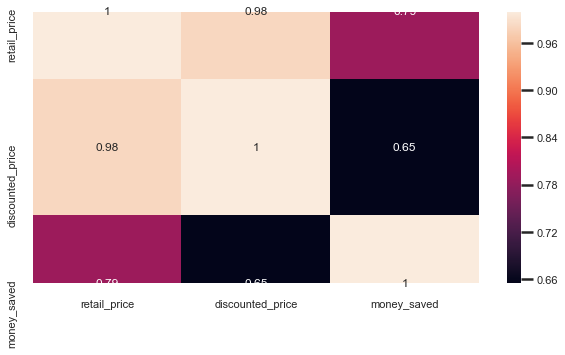

In [72]:
plt.figure(figsize=(10,5))
sns.set_context('poster',font_scale=0.5)
sns.heatmap(df.corr(),annot=True)

# Bar graphs

Count of different product catagories :


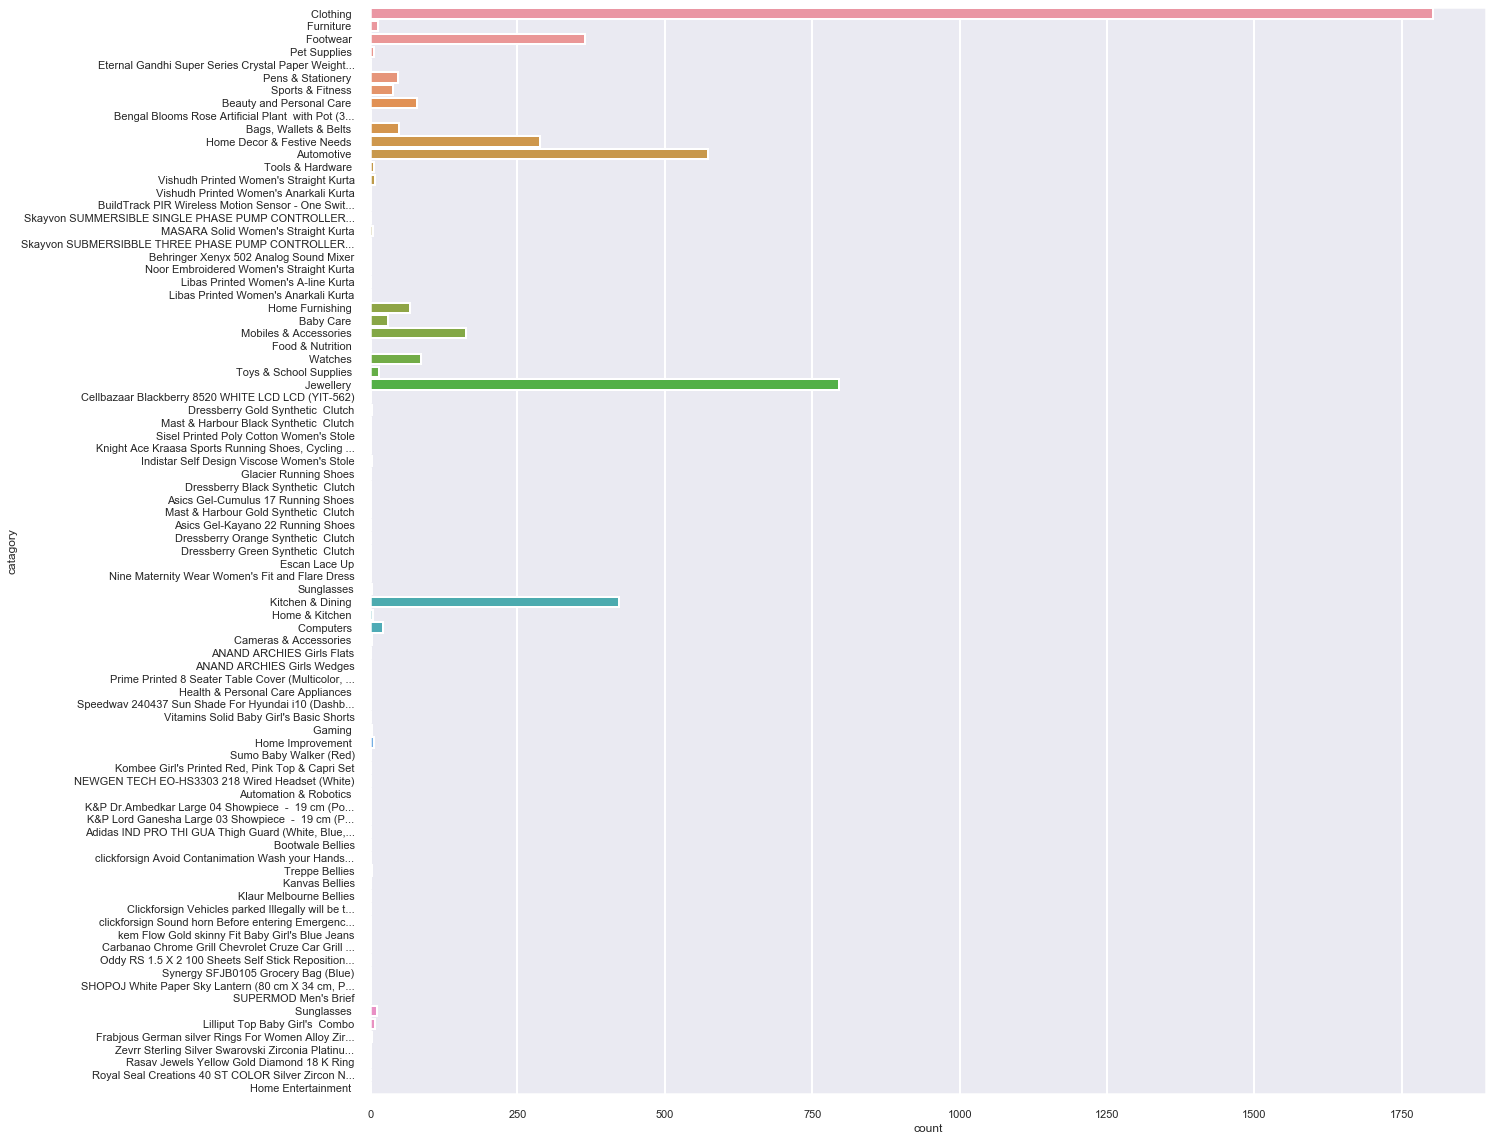

In [74]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y=df.head(5000)['catagory'], ax=ax)

print("Count of different product catagories :")
plt.show()

Count of different brands :


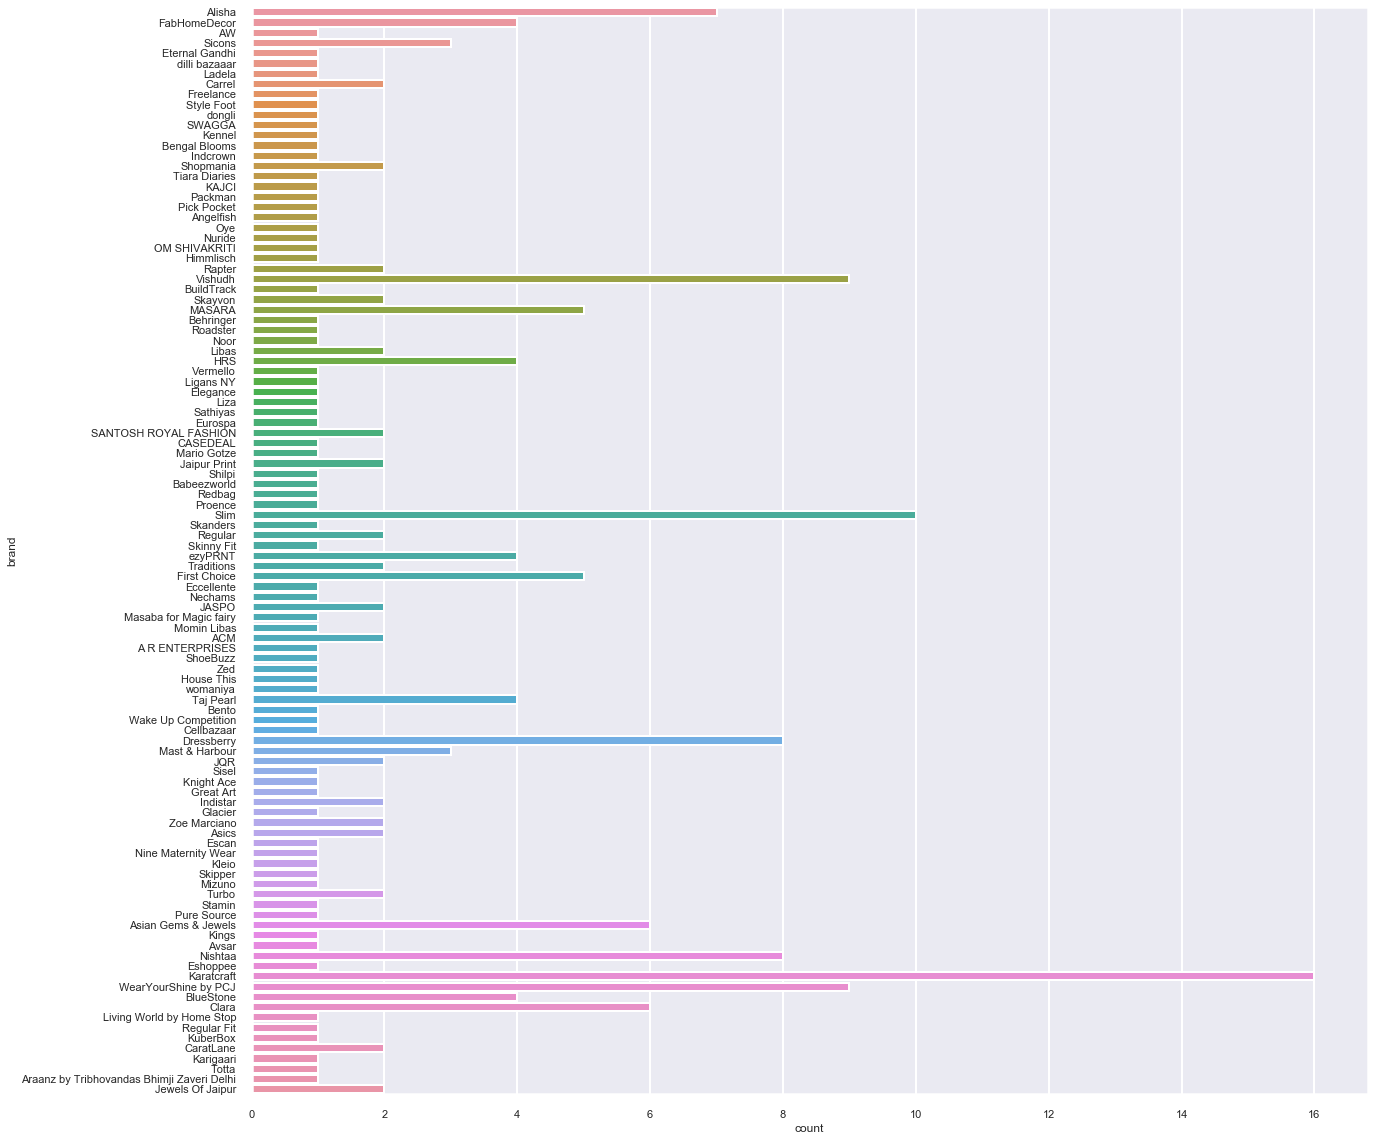

In [75]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y=df.head(600)['brand'], ax=ax)
print("Count of different brands :")
plt.show()

Count of product purchased on various days of the month :


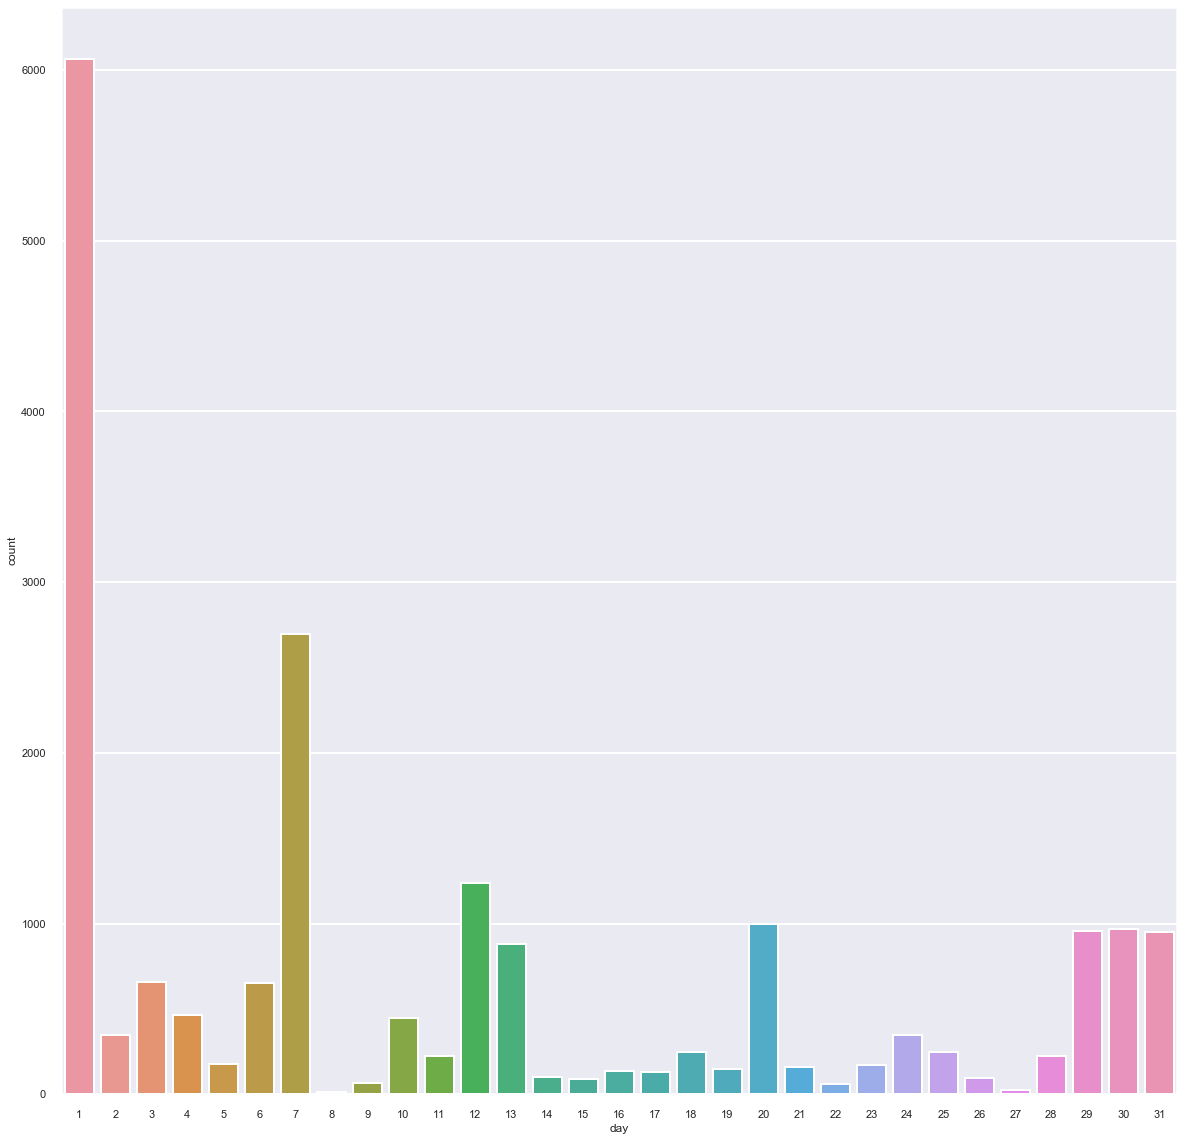

In [76]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df['day'], ax=ax)
print("Count of product purchased on various days of the month :")
plt.show()

Count of products purchased on various month in a year :


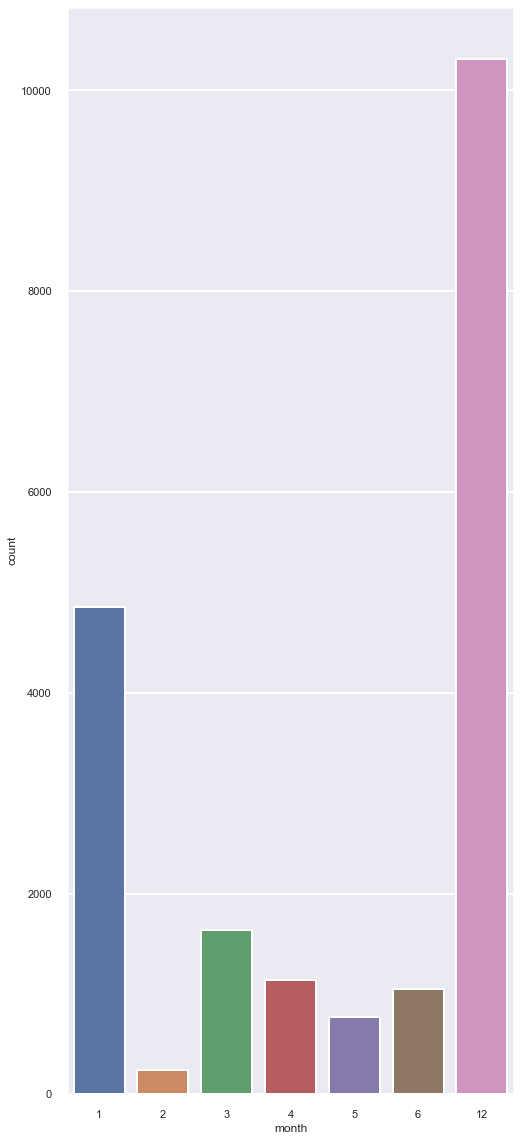

In [77]:
fig_dims = (8, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df['month'], ax=ax)
print("Count of products purchased on various month in a year :")

plt.show()

Count of number of products purchased on various years :


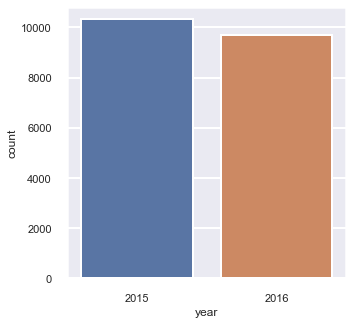

In [78]:
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df['year'], ax=ax)
print("Count of number of products purchased on various years :")

plt.show()

# Distplot

Univariate Obervation of discounted prices


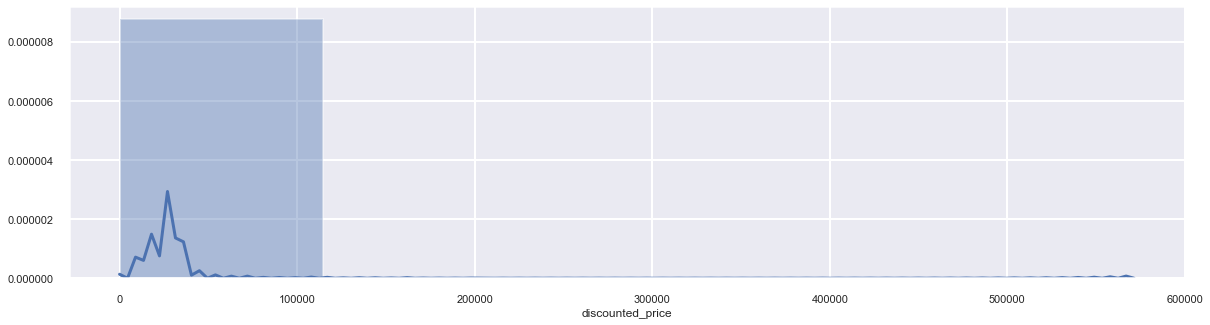

In [79]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
dff=df['discounted_price']
dff.dropna(how='any',inplace=True)
print('Univariate Obervation of discounted prices')
sns.distplot(dff, bins=5,ax=ax)

Univariate Obervation of money_saved


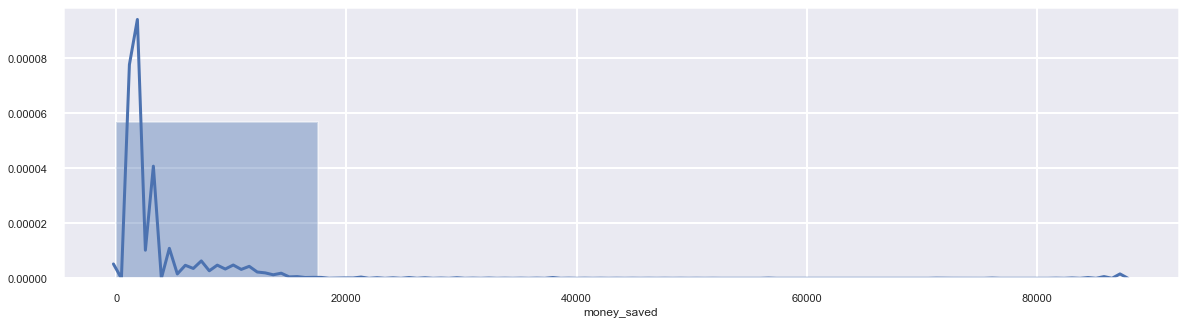

In [80]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
dff=df['money_saved']
dff.dropna(how='any',inplace=True)
print('Univariate Obervation of money_saved')
sns.distplot(dff, bins=5,ax=ax)

joint plot of discounted and retail price


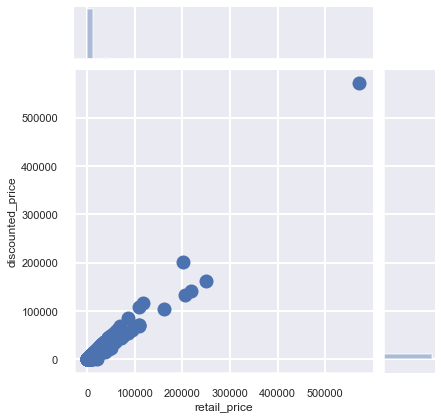

In [82]:
df6=pd.read_csv('flipkart_com-ecommerce.csv')

print('joint plot of discounted and retail price')
sns.jointplot(x=df6["retail_price"], y=df6["discounted_price"]);

In [83]:
df.head()

,product_name,pid,retail_price,discounted_price,brand,Date,day,month,year,catagory,money_saved
0,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,Alisha,2016-03-25,25,3,2016,Clothing,620.0
1,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor,2016-03-25,25,3,2016,Furniture,9511.0
2,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,AW,2016-03-25,25,3,2016,Footwear,500.0
3,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,Alisha,2016-03-25,25,3,2016,Clothing,432.0
4,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,Sicons,2016-03-25,25,3,2016,Pet Supplies,10.0


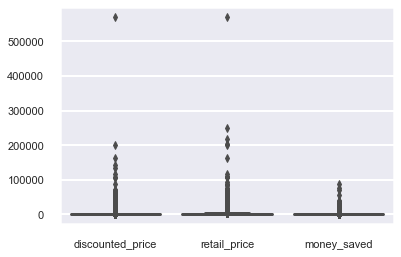

In [84]:
df['money_saved']=[x-y for x,y in zip(rpl,dpl) ]
df4=df[['discounted_price','retail_price','money_saved']]
sns.boxplot(data=df4)

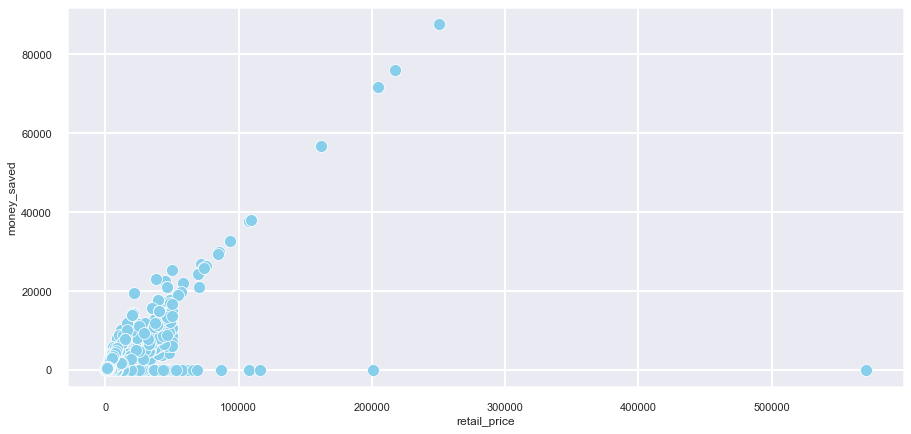

In [85]:
plt.figure(figsize=(15, 7))
sns.set_palette(['skyblue'])
sns.scatterplot(data = df, x = df['retail_price'], y = df['money_saved'])

# Clustering

In [134]:
from sklearn.cluster import KMeans


In [136]:

Y= df[['discounted_price','money_saved']]
Y.dtypes
Y=Y.dropna(how='any')
X['discounted_price']=Y['discounted_price'].astype(int)
X['money_saved']=Y['money_saved'].astype(int)



In [137]:
X.describe()

,discounted_price,money_saved
count,19922.000000,19922.000000
mean,1973.401767,1005.804337
std,7333.586040,2301.340266
min,35.000000,0.000000
25%,350.000000,180.000000
50%,550.000000,456.000000
75%,999.000000,900.000000
max,571230.000000,87675.000000


In [138]:

"""Y['discounted_price']=X['discounted_price'].astype('int')
Y['money_saved']=X['money_saved'].astype('int')
Y.info()
Y.isnull().sum()
"""
Y= X.iloc[:, [0,1]].values
Y

array([[  379,   620],
       [22646,  9511],
       [  499,   500],
       ...,
       [  999,   300],
       [ 1199,   300],
       [  999,   500]])

In [139]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

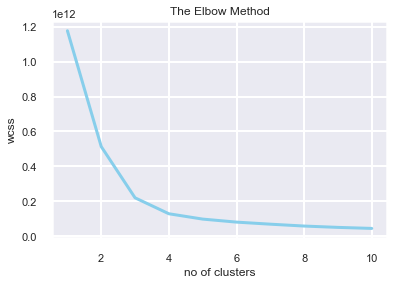

In [140]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [141]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(Y)


In [142]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df2f = pca.fit_transform(Y)

In [143]:
print(y_kmeans)

[0 1 0 ... 0 0 0]


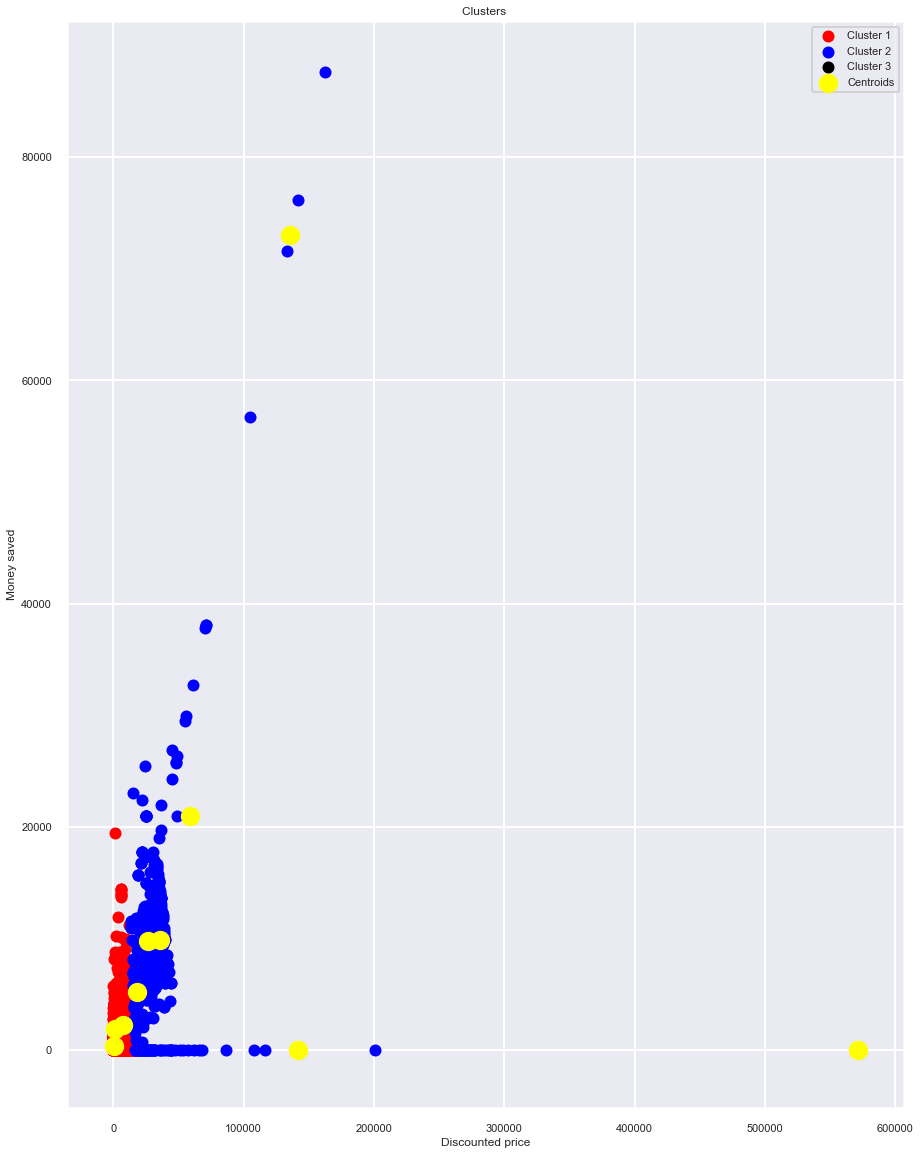

In [144]:
plt.figure(figsize=(15, 20))
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'black', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters ')
plt.xlabel('Discounted price')
plt.ylabel('Money saved')
plt.legend()
plt.show()

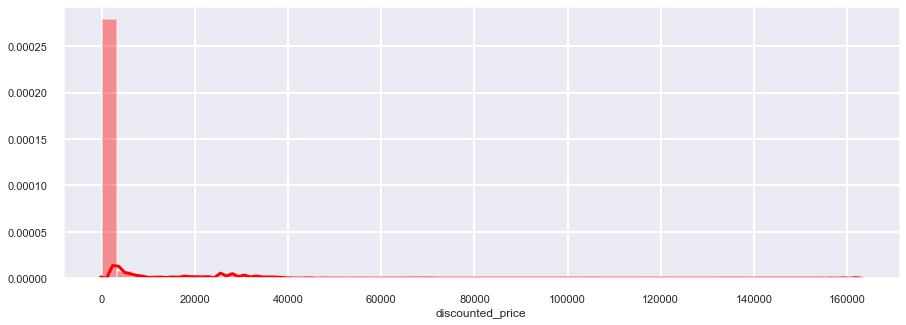

In [146]:
df.dropna(how='any',inplace=True)
plt.figure(figsize=(15,5))
sns.set_context("poster", font_scale=.5)
sns.set_palette(['red'])
sns.distplot(df['discounted_price'])

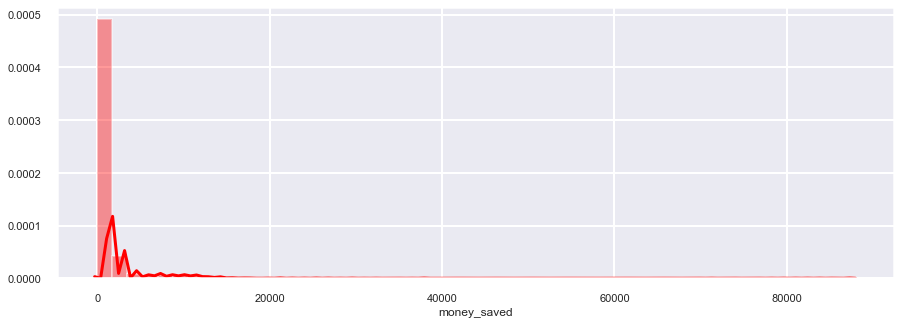

In [147]:
plt.figure(figsize=(15,5))
sns.set_context("poster", font_scale=.5)
sns.set_palette(['red'])
sns.distplot(df['money_saved'])